In [ ]:
!pip install tensorflow opencv-python matplotlib -q


import tensorflow as tf
import os

import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# os.path.join('data', 'happy')
# os.listdir('data')

In [ ]:
!ls "/content/drive/My Drive/cnn"

data


**GPU optimization cause tf is a menace**

In [ ]:
# OOM errors
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


In [ ]:
data_dir = '/content/drive/My Drive/cnn/data'
models_dir = '/content/drive/My Drive/cnn/data/models'
os.listdir(os.path.join(data_dir, 'happy'))

# os.listdir(data_dir)
# image_exts = ['jpeg', 'jpg', 'bmp', 'png']
# image_exts[2]

['download (4).jpg',
 'download (10).jpg',
 'download (9).jpg',
 'download.png',
 'download (5).jpg',
 'download (6).jpg',
 'download (8).jpg',
 'download (1).jpg',
 'download.jpg',
 'download (7).jpg',
 'download (2).jpg',
 'download (21).jpg',
 'download (11).jpg',
 'download (13).jpg',
 'download (23).jpg',
 'download (18).jpg',
 'download (17).jpg',
 'download (15).jpg',
 'download (20).jpg',
 'download (19).jpg',
 'download (12).jpg',
 'download (22).jpg',
 'download (14).jpg',
 'download (16).jpg',
 'images (1).jpg',
 'download (24).jpg',
 'download (31).jpg',
 'images (2).jpg',
 'images (3).jpg',
 'download (29).jpg',
 'download (30).jpg',
 'download (25).jpg',
 'download (28).jpg',
 'download (26).jpg',
 'images (21).jpg',
 'images (24).jpg',
 'images (31).jpg',
 'images (30).jpg',
 'images (29).jpg',
 'images (27).jpg',
 'images (12).jpg',
 'images (20).jpg',
 'images (26).jpg',
 'images (25).jpg',
 'images (16).jpg',
 'images (14).jpg',
 'images (13).jpg',
 'images (19).jpg',

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

download (1).jpg
download (3).jpg
download (8).jpg
download (5).jpg
download.jpg
download (9).jpg
download (6).jpg
download (7).jpg
download (12).jpg
download (1).png
download (13).jpg
download (11).jpg
download.png
download (2).jpg
download (4).jpg
download (10).jpg
download (14).jpg
download (20).jpg
download (21).jpg
download (19).jpg
download (29).jpg
download (27).jpg
download (15).jpg
download (23).jpg
download (22).jpg
download (28).jpg
download (26).jpg
download (25).jpg
download (16).jpg
download (17).jpg
download (18).jpg
download (24).jpg
download (4).jpg
download (10).jpg
download (9).jpg
download.png
download (5).jpg
download (6).jpg
download (8).jpg
download (1).jpg
download.jpg
download (7).jpg
download (2).jpg
download (21).jpg
download (11).jpg
download (13).jpg
download (23).jpg
download (18).jpg
download (17).jpg
download (15).jpg
download (20).jpg
download (19).jpg
download (12).jpg
download (22).jpg
download (14).jpg
download (16).jpg
images (1).jpg
download (24).j

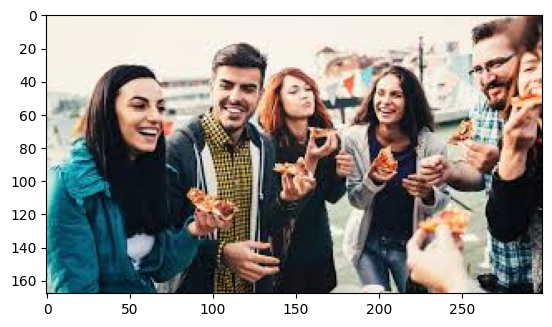

In [ ]:
img = cv2.imread(os.path.join(data_dir, 'happy', 'images (20).jpg'))
img.shape
# 3 channels means colored

# matplot does rgb images, opencv reads bgr
# plt.imshow(img)
# Workaround
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

**Remove dodgy images**

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
image_exts[2]
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))
        # os.remove(image_path)

In [ ]:
tf.data.Dataset??

In [ ]:
# data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=8, image_size=128,128)
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 91 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
# data_iterator
# Get another batch as well
batch = data_iterator.next()
# len(batch) images, and labels

# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]
# 1, 0 represents happy or sad

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

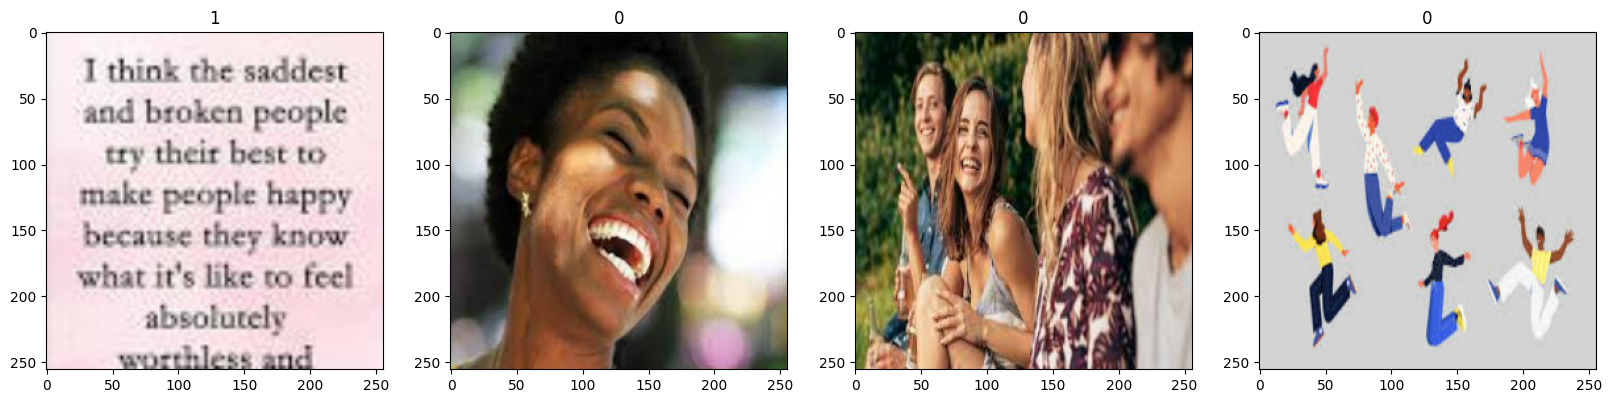

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Preprocessing data**

*   Scale image values to be 0/1
*   Generalize fater produce better results

*   tst to avoid overfitting





**Scale data**

In [ ]:
# scaled = batch[0]/255
# scaled.max()
data = data.map(lambda x, y :(x/255, y))
# x represents images , y target variables


In [ ]:
scaled_iterator = data.as_numpy_iterator()

scaled_iterator.next()[0].max()
# Lower than 1 could mean error due to smt???


1.0

**Train test split**

In [ ]:
len(data)

3

In [ ]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size+test_size+val_size

3

In [ ]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size).take(test_size)

In [ ]:
len(test)

1

**Deep Model**


*   List item

*   List item
*   List item


*   List item



In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.6788 - accuracy: 0.6250 - val_loss: 1.3653 - val_accuracy: 0.6250
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 1.3439 - accuracy: 0.6562 - val_loss: 0.4663 - val_accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 4s 4s/step - loss: 0.5600 - accuracy: 0.6875 - val_loss: 0.7040 - val_accuracy: 0.4375
Epoch 4/20
1/1 [==============================] - 4s 4s/step - loss: 0.7674 - accuracy: 0.3125 - val_loss: 0.5963 - val_accuracy: 0.8750
Epoch 5/20
1/1 [==============================] - 7s 7s/step - loss: 0.6136 - accuracy: 0.8750 - val_loss: 0.5863 - val_accuracy: 0.6562
Epoch 6/20
1/1 [==============================] - 4s 4s/step - loss: 0.5866 - accuracy: 0.6250 - val_loss: 0.6620 - val_accuracy: 0.5312
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.5047 - accuracy: 0.7188 - val_loss: 0.4335 - val_accuracy: 0.7500
Epoch 8/20
1/1 [=========================

In [ ]:
hist.history

{'loss': [0.678846001625061,
  1.3438671827316284,
  0.5600348114967346,
  0.7673592567443848,
  0.613601803779602,
  0.5865542888641357,
  0.5047398805618286,
  0.46952784061431885,
  0.40903353691101074,
  0.47967612743377686,
  0.42558491230010986,
  0.3545983135700226,
  0.4127318263053894,
  0.2200835943222046,
  0.2937246859073639,
  0.29804953932762146,
  0.2904512584209442,
  0.17318683862686157,
  0.15891435742378235,
  0.12361980974674225],
 'accuracy': [0.625,
  0.65625,
  0.6875,
  0.3125,
  0.875,
  0.625,
  0.71875,
  0.6875,
  0.78125,
  0.71875,
  0.9375,
  0.90625,
  0.75,
  1.0,
  0.875,
  0.875,
  0.84375,
  0.96875,
  0.9375,
  0.96875],
 'val_loss': [1.365346908569336,
  0.46625205874443054,
  0.7040229439735413,
  0.5963379740715027,
  0.5862758159637451,
  0.6619587540626526,
  0.433515727519989,
  0.47614383697509766,
  0.5059291124343872,
  0.4584764242172241,
  0.39380720257759094,
  0.4265212118625641,
  0.3146633505821228,
  0.28765496611595154,
  0.32782113

Plot performance

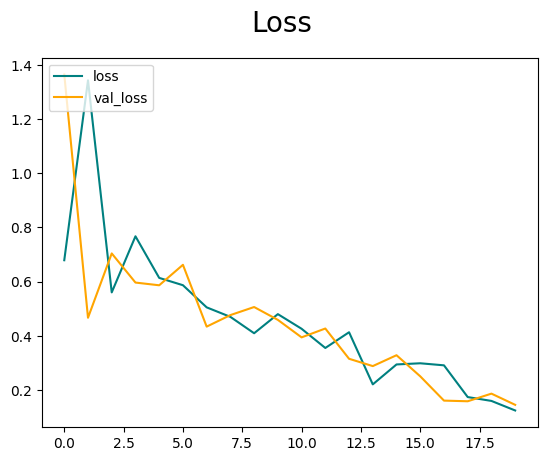

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

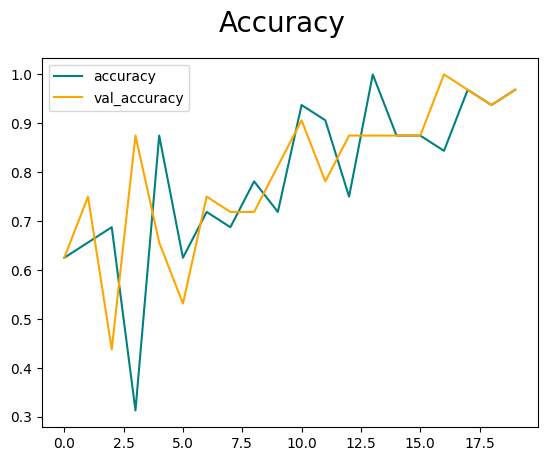

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

**Evaluate performance**


*   Test data

*   precision recoil accuracy
*   List item


*   List item



Evaluate

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 1s 523ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.9285714030265808, Accuracy: 0.96875


**Test**

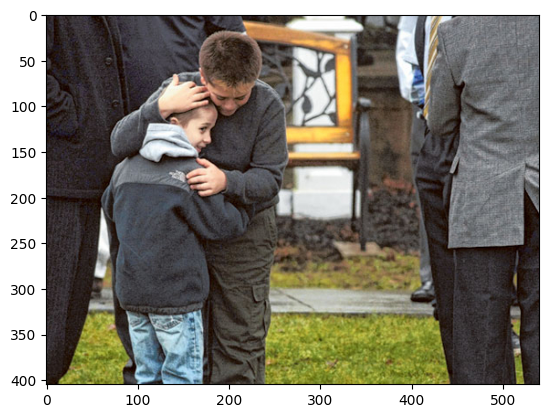

In [ ]:
# img = cv2.imread('sad1.jpg')
img = cv2.imread('s1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

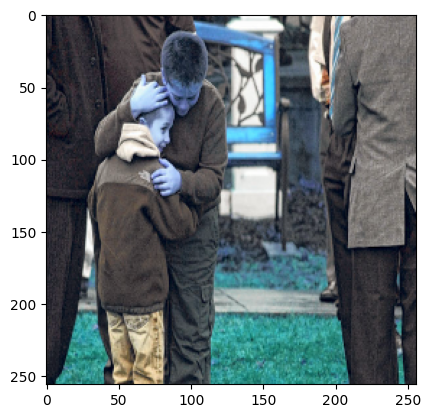

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# resize
# resize.shape

In [ ]:
np.expand_dims(resize, 0).shape
# np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 39ms/step


In [ ]:
yhat

array([[0.24657582]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is sad.')
else:
  print(f'Predicted class is happy!')

Predicted class is sad.


Save model
Deploy as api

In [ ]:
model.save(os.path.join(models_dir, 'happysadmodel.h5'))

In [ ]:
new_model = load_model(os.path.join(models_dir, 'happysadmodel.h5'))

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 154ms/step


In [ ]:
if yhat_new > 0.5:
  print(f'Predicted class is sad.')
else:
  print(f'Predicted class is happy!')